In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('../../Dataset/onehot.csv')
# drop Name Column
df.drop('Name', axis=1, inplace=True)

# randomize the rows
df = df.sample(frac=1).reset_index(drop=True)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.3, random_state=42)

In [34]:
X_train.shape

(770, 1672)

In [35]:
svm = SVC(kernel='linear', C=1.0, random_state=47)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

In [36]:
X_trainC, X_testC, y_trainC, y_testC= X_train, X_test, y_train, y_test

## SVM without PCA

In [37]:
accuracy_score(y_test, y_pred)

0.9545454545454546

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       160
           1       0.98      0.94      0.95       170

    accuracy                           0.95       330
   macro avg       0.95      0.96      0.95       330
weighted avg       0.96      0.95      0.95       330



In [39]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [40]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

## SVM with PCA

In [41]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

In [42]:
# print the PCA components
print(pca.fit(X_train))

PCA(n_components=100)


In [43]:
# print the PCA transformation matrix
print(pca.components_.shape)
print(pca.components_)

(100, 1672)
[[ 8.86698875e-02  4.95304681e-02  9.41939533e-02 ...  0.00000000e+00
  -1.48507615e-03 -1.48507615e-03]
 [ 9.54245802e-03  1.87677554e-03  1.24756432e-02 ... -0.00000000e+00
  -5.76369795e-04 -5.76369795e-04]
 [ 1.76025582e-02 -1.69077633e-02  2.91695107e-02 ... -0.00000000e+00
   5.98283190e-05  5.98283190e-05]
 ...
 [ 1.91214816e-02 -1.18892077e-02 -1.86066101e-02 ... -0.00000000e+00
  -4.74240694e-03 -4.74240694e-03]
 [-1.53017474e-03  1.72487048e-02  3.50316879e-02 ...  0.00000000e+00
   1.27315137e-02  1.27315137e-02]
 [ 3.13162463e-02  4.51772989e-02  1.70471101e-02 ... -0.00000000e+00
  -3.13545639e-02 -3.13545639e-02]]


In [44]:
# print the shape of the data before and after PCA
print(X_train.shape)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_train.shape)

(770, 1672)
(770, 100)


In [45]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [46]:
svm = SVC(kernel='linear', C=1.0, random_state=47)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=47)

In [47]:
y_pred = svm.predict(X_test)

accuracy_score(y_test,
 y_pred)

0.9242424242424242

In [48]:
# implelemt grid search 
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

# grid.best_params_

# grid.best_estimator_

grid_predictions = grid.predict(X_test)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.519 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.519 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.519 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.519 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.753 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.831 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.799 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.773 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.903 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [49]:

accuracy_score(y_test, grid_predictions)

0.9393939393939394

In [50]:
pca.explained_variance_ratio_

array([0.03544369, 0.03273796, 0.02837025, 0.0264114 , 0.02243961,
       0.02038526, 0.01996707, 0.01901164, 0.01835731, 0.0172089 ,
       0.01653997, 0.01632704, 0.01480186, 0.01467887, 0.01456478,
       0.01440165, 0.01412457, 0.01397532, 0.01328732, 0.01305433,
       0.01293161, 0.01283289, 0.01231281, 0.0120593 , 0.01170206,
       0.0116686 , 0.01154956, 0.01112872, 0.01089076, 0.01083717,
       0.01054593, 0.0104679 , 0.01035067, 0.01008858, 0.00993542,
       0.00959501, 0.00937233, 0.00930077, 0.00924294, 0.00912592,
       0.00894652, 0.00879872, 0.00879336, 0.00869895, 0.00857869,
       0.00846745, 0.00840172, 0.00815742, 0.00802143, 0.00801305,
       0.00793034, 0.00786563, 0.00781771, 0.00775734, 0.00769014,
       0.00759229, 0.00748567, 0.00744932, 0.00741303, 0.00730313,
       0.00718204, 0.00711311, 0.00708867, 0.00701031, 0.00682561,
       0.00680329, 0.00674759, 0.00663955, 0.00659932, 0.00655266,
       0.00652506, 0.00644575, 0.00638171, 0.00634836, 0.00625

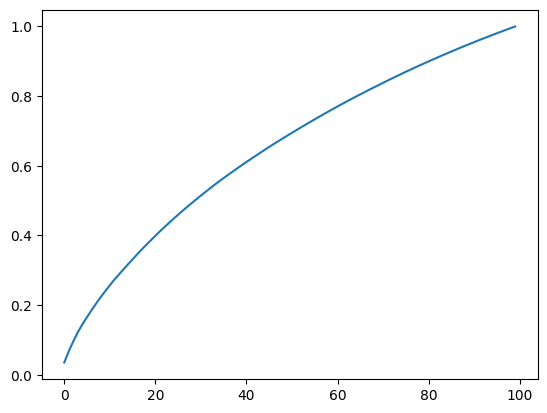

In [51]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [52]:
X_train, X_test, y_train, y_test = X_trainC, X_testC, y_trainC, y_testC

### Effect of number of components

In [53]:
# plotting for number of components vs accuracy
accuracies = []

for num_components in range(1, 1000):
    X_train, X_test, y_train, y_test = X_trainC, X_testC, y_trainC, y_testC
    pca = PCA(n_components=num_components)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    svm = SVC(kernel='linear', C=1.0, random_state=0)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))


KeyboardInterrupt: 

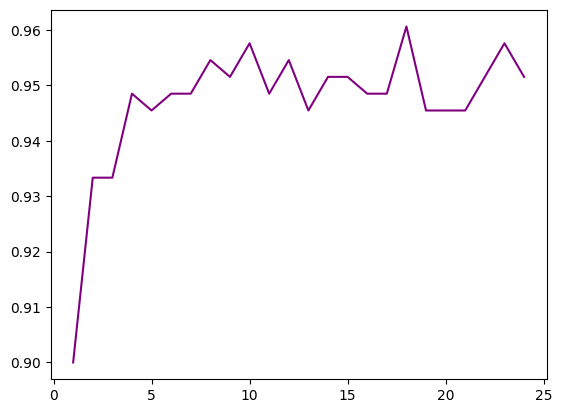

In [ ]:
# change color to purple
plt.plot(range(1, 25), accuracies, color='purple')

In [ ]:
pca.explained_variance_

array([1.48619613, 0.61427473, 0.40576596, 0.3581045 , 0.32281878,
       0.26487931, 0.23108398, 0.21506946, 0.19976505, 0.17570005,
       0.17195043, 0.1642068 , 0.1548568 , 0.15036435, 0.14968298,
       0.13828645, 0.13482655, 0.13390612, 0.12745692, 0.12669842,
       0.12207153, 0.12055291, 0.1174182 , 0.11540231])